# Optimizer
The original notebook is here - https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist  # load dataset

# split into testing and training
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()  


In [5]:
# 60,000 images that are made up of 28x28 pixels (784 in total).
train_images.shape

(60000, 28, 28)

In [6]:
train_images[0,23,23]  # let's have a look at one pixel

194

Our pixel values are between 0 and 255, 0 being black and 255 being white. This means we have a grayscale image as there are no color channels.


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

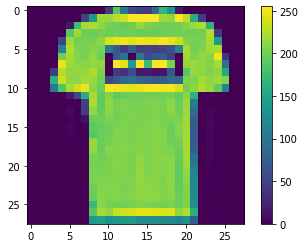

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

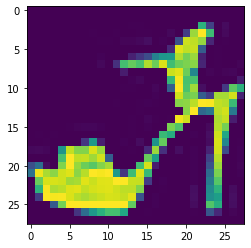

In [10]:
plt.imshow(train_images[9])

## Data Preprocessing
The last step before creating our model is to *preprocess* our data. This simply means applying some prior transformations to our data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [11]:
train_images = train_images / 255.0

test_images = test_images / 255.0

## Building the Model
Now it's time to build the model! We are going to use a keras *sequential* model with three different layers. This model represents a feed-forward neural network (one that passes values from left to right). We'll break down each layer and its architecture below

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

**Layer 1:** This is our input layer and it will have 784 neurons. We use the flatten layer with an input shape of (28,28) to denote that our input should come in in that shape. The flatten means that our layer will reshape the shape (28,28) array into a vector of 784 neurons so that each pixel will be associated with one neuron.

**Layer 2:** This is our first and only hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectify linear unit activation function.

**Layer 3:** This is our output later and is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probabillity of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probabillity distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probabillity of the image being that class.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# we pass the data, labels and epochs and watch the magic!
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5008 - accuracy: 0.8253
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3145 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2966 - accuracy: 0.8899
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2831 - accuracy: 0.8945
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2706 - accuracy: 0.8989
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2580 - accuracy: 0.9049
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.240

## Evaluating the Model
Now it's time to test/evaluate the model. We can do this quite easily using another builtin method from keras.

The *verbose* argument is defined from the keras documentation as:
"verbose: 0 or 1. Verbosity mode. 0 = silent, 1 = progress bar."
(https://keras.io/models/sequential/)

In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8847
Test accuracy: 0.8847000002861023


## Making Predictions
To make predictions we simply need to pass an array of data in the form we've specified in the input layer to ```.predict()``` method.

In [18]:
predictions = model.predict(test_images)

In [19]:
predictions[0]

array([8.3549700e-08, 1.1877603e-09, 1.5391591e-09, 6.7795827e-09,
       2.9342622e-09, 3.3319672e-03, 1.9476622e-07, 3.2161880e-02,
       3.2498286e-07, 9.6450549e-01], dtype=float32)

The prediction above meants that the model things that there is .00000835% probability that it is of type 1 (T-shirt/top) and 96.45% probability that it is of type 10 (Shoe).

We can use `argmax` function to always pick the index of the array that has the largest value.

In [20]:
np.argmax(predictions[0])

9

In [21]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

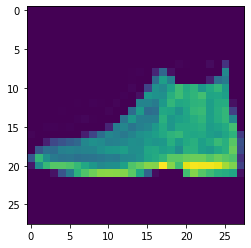

In [23]:
# Now lets print the test Image to see if the prediction is right.
plt.imshow(test_images[0])